# 1. Import Libraries

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# 2. Loading Data 

In [25]:
df = pd.read_csv("processed_data.csv")

In [26]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52.0,1.0,0,125,212,0,1.0,168,0,1.0,2,2,3,0
1,53.0,1.0,0,140,203,1,0.0,155,1,3.1,0,0,3,0
2,70.0,1.0,0,145,174,0,1.0,125,1,2.6,0,0,3,0
3,61.0,1.0,0,148,203,0,1.0,161,0,0.0,2,1,3,0
4,62.0,0.0,0,138,294,1,1.0,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59.0,1.0,1,140,221,0,1.0,164,1,0.0,2,0,2,1
1021,56.0,1.0,0,125,258,0,0.0,141,1,2.8,1,1,3,0
1022,47.0,1.0,0,110,275,0,0.0,118,1,1.0,1,1,2,0
1023,50.0,0.0,0,110,254,0,0.0,159,0,0.0,2,0,2,1


In [27]:
# ------------------- Preprocessing -------------------
X = df.drop(['target', 'restecg'], axis=1)

In [28]:
X.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
dtype: int64

# 3. Elbow Method 

In [29]:
inertia = []
K_range = range(1, 10) # 1 9 
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

## 3.1 Plot Inertia vs K

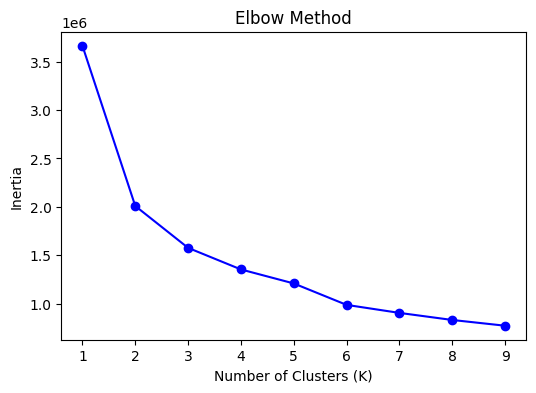

In [30]:
plt.figure(figsize=(6,4))
plt.plot(K_range, inertia, 'bo-')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.savefig(os.path.join(CLUSTER_DIR, "elbow_plot.png"))
plt.show()

## 3.2 Fit KMeans

In [31]:
optimal_k = 3  # Replace with elbow point from plot
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans_final.fit_predict(X)

# 4. Evaluation 

## 4.1 Silhoutte score

In [32]:
# Add cluster labels to DataFrame
df['cluster'] = cluster_labels

# ------------------- Silhouette Score -------------------
sil_score = silhouette_score(X, cluster_labels)
print("Silhouette Score:", sil_score)

with open(os.path.join(CLUSTER_DIR, "clustering_metrics.txt"), "w") as f:
    f.write("Model: K-Means\n")
    f.write(f"Optimal K: {kmeans.n_clusters}\n")
    f.write(f"Silhouette Score: {sil_score}\n")

Silhouette Score: 0.2905874455269022


## 4.2 Visualization Score 

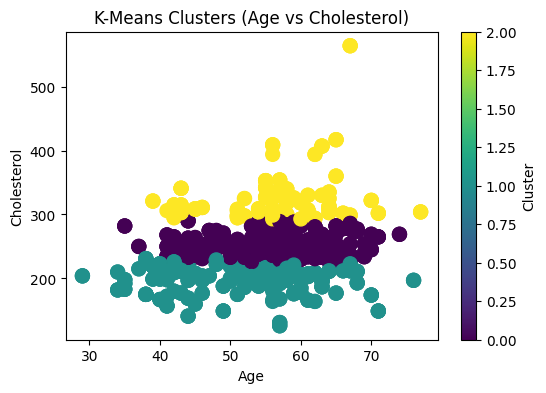

In [33]:
# Plotting two key features: age vs chol
plt.figure(figsize=(6,4))
plt.scatter(df['age'], df['chol'], c=df['cluster'], cmap='viridis', s=100)
plt.xlabel("Age")
plt.ylabel("Cholesterol")
plt.title("K-Means Clusters (Age vs Cholesterol)")
plt.savefig(os.path.join(CLUSTER_DIR, "Age vs Cholesterol with clusters.png"))
plt.colorbar(label='Cluster')
plt.show()

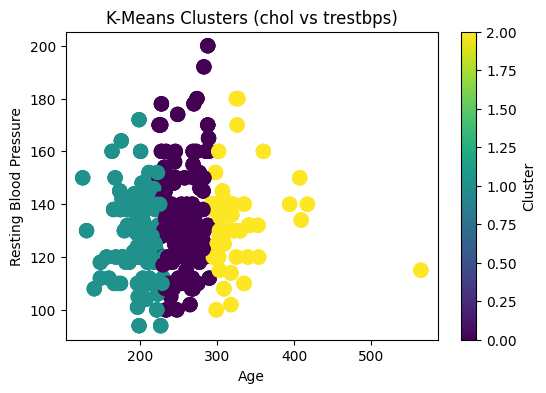

In [34]:
# Plotting two key features: chol vs trestbps
plt.figure(figsize=(6,4))
plt.scatter(df['chol'], df['trestbps'], c=df['cluster'], cmap='viridis', s=100)
plt.xlabel("Age")
plt.ylabel("Resting Blood Pressure")
plt.title("K-Means Clusters (chol vs trestbps)")
plt.savefig(os.path.join(CLUSTER_DIR, "chol vs trestbps with clusters.png"))
plt.colorbar(label='Cluster')
plt.show()

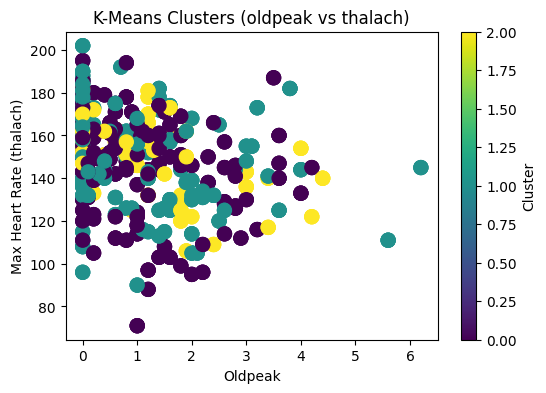

In [35]:
# Plotting oldpeak vs thalach 
plt.figure(figsize=(6,4))
plt.scatter(df['oldpeak'], df['thalach'], c=df['cluster'], cmap='viridis', s=100)
plt.xlabel("Oldpeak")
plt.ylabel("Max Heart Rate (thalach)")
plt.title("K-Means Clusters (oldpeak vs thalach)")
plt.savefig(os.path.join(CLUSTER_DIR, "oldpeak vs thalach with clusters.png"))
plt.colorbar(label='Cluster')
plt.show()
